In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
import plotly.express as px

In [20]:
df = pd.read_csv("books_data_with_url.csv")
df.head()

title  stars  price  book_stars  \
0                 達人に学ぶDB設計 徹底指南書 初級者で終わりたくないあなたへ    333   2860         4.4   
1                 スッキリわかるPython入門 (スッキリわかる入門シリーズ)    632   2640         4.2   
2               達人に学ぶSQL徹底指南書 第2版 初級者で終わりたくないあなたへ    248   2750         4.5   
3        SQL 第2版 ゼロからはじめるデータベース操作 (プログラミング学習シリーズ)    352   2068         4.3   
4  体系的に学ぶ 安全なWebアプリケーションの作り方 第2版 脆弱性が生まれる原理と対策の実践    226   3520         4.4   

              author                                           book_url  \
0     \nミック \n(著) \n  https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
1  \n国本大悟 \n(著),  \n  https://www.amazon.co.jp/-/en/%E5%9B%BD%E6%9C%...   
2     \nミック \n(著) \n  https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
3     \nミック \n(著) \n  https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
4    \n徳丸 浩 \n(著) \n  https://www.amazon.co.jp/-/en/%E5%BE%B3%E4%B8%...   

  books_pages  
0           0  
1   376 pages  
2   368 pages  
3   336 pages  
4   688 pages

In [21]:
df['books_pages'] = df['books_pages'].str.replace(' pages', '')
df['books_pages'] = df['books_pages'].str.replace(' After viewing product detail, look here to find an easy way to navigate back to you are interested in. ', '0')
df['books_pages'] = pd.to_numeric(df['books_pages'])
df.to_csv('updated_data.csv', index=False)

df.head()

C:\Users\deymo\AppData\Local\Temp\ipykernel_31076\1546376738.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['books_pages'] = df['books_pages'].str.replace(' After viewing product detail, look here to find an easy way to navigate back to you are interested in. ', '0')


title  stars  price  book_stars  \
0                 達人に学ぶDB設計 徹底指南書 初級者で終わりたくないあなたへ    333   2860         4.4   
1                 スッキリわかるPython入門 (スッキリわかる入門シリーズ)    632   2640         4.2   
2               達人に学ぶSQL徹底指南書 第2版 初級者で終わりたくないあなたへ    248   2750         4.5   
3        SQL 第2版 ゼロからはじめるデータベース操作 (プログラミング学習シリーズ)    352   2068         4.3   
4  体系的に学ぶ 安全なWebアプリケーションの作り方 第2版 脆弱性が生まれる原理と対策の実践    226   3520         4.4   

              author                                           book_url  \
0     \nミック \n(著) \n  https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
1  \n国本大悟 \n(著),  \n  https://www.amazon.co.jp/-/en/%E5%9B%BD%E6%9C%...   
2     \nミック \n(著) \n  https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
3     \nミック \n(著) \n  https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
4    \n徳丸 浩 \n(著) \n  https://www.amazon.co.jp/-/en/%E5%BE%B3%E4%B8%...   

   books_pages  
0            0  
1          376  
2          368  
3          336  
4          688

In [22]:
df.dtypes

title           object
stars            int64
price            int64
book_stars     float64
author          object
book_url        object
books_pages      int64
dtype: object

In [23]:
df['author'] = df['author'].str.replace(r'(\n|\n\(著\) \n|\(\))|\,', '', regex=True)                                
df.head()

title  stars  price  book_stars  \
0                 達人に学ぶDB設計 徹底指南書 初級者で終わりたくないあなたへ    333   2860         4.4   
1                 スッキリわかるPython入門 (スッキリわかる入門シリーズ)    632   2640         4.2   
2               達人に学ぶSQL徹底指南書 第2版 初級者で終わりたくないあなたへ    248   2750         4.5   
3        SQL 第2版 ゼロからはじめるデータベース操作 (プログラミング学習シリーズ)    352   2068         4.3   
4  体系的に学ぶ 安全なWebアプリケーションの作り方 第2版 脆弱性が生まれる原理と対策の実践    226   3520         4.4   

       author                                           book_url  books_pages  
0    ミック (著)   https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...            0  
1  国本大悟 (著)    https://www.amazon.co.jp/-/en/%E5%9B%BD%E6%9C%...          376  
2    ミック (著)   https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...          368  
3    ミック (著)   https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...          336  
4   徳丸 浩 (著)   https://www.amazon.co.jp/-/en/%E5%BE%B3%E4%B8%...          688

In [24]:
df = df.rename(columns={'stars': 'reviews_num'})
df.head()

title  reviews_num  price  \
0                 達人に学ぶDB設計 徹底指南書 初級者で終わりたくないあなたへ          333   2860   
1                 スッキリわかるPython入門 (スッキリわかる入門シリーズ)          632   2640   
2               達人に学ぶSQL徹底指南書 第2版 初級者で終わりたくないあなたへ          248   2750   
3        SQL 第2版 ゼロからはじめるデータベース操作 (プログラミング学習シリーズ)          352   2068   
4  体系的に学ぶ 安全なWebアプリケーションの作り方 第2版 脆弱性が生まれる原理と対策の実践          226   3520   

   book_stars      author                                           book_url  \
0         4.4    ミック (著)   https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
1         4.2  国本大悟 (著)    https://www.amazon.co.jp/-/en/%E5%9B%BD%E6%9C%...   
2         4.5    ミック (著)   https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
3         4.3    ミック (著)   https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
4         4.4   徳丸 浩 (著)   https://www.amazon.co.jp/-/en/%E5%BE%B3%E4%B8%...   

   books_pages  
0            0  
1          376  
2          368  
3          336  
4          688

In [25]:
average_pages = df.loc[df['books_pages'] != 0, 'books_pages'].mean()
df['books_pages'] = df['books_pages'].apply(lambda x: round(average_pages) if x == 0 else x)
df.head()

title  reviews_num  price  \
0                 達人に学ぶDB設計 徹底指南書 初級者で終わりたくないあなたへ          333   2860   
1                 スッキリわかるPython入門 (スッキリわかる入門シリーズ)          632   2640   
2               達人に学ぶSQL徹底指南書 第2版 初級者で終わりたくないあなたへ          248   2750   
3        SQL 第2版 ゼロからはじめるデータベース操作 (プログラミング学習シリーズ)          352   2068   
4  体系的に学ぶ 安全なWebアプリケーションの作り方 第2版 脆弱性が生まれる原理と対策の実践          226   3520   

   book_stars      author                                           book_url  \
0         4.4    ミック (著)   https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
1         4.2  国本大悟 (著)    https://www.amazon.co.jp/-/en/%E5%9B%BD%E6%9C%...   
2         4.5    ミック (著)   https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
3         4.3    ミック (著)   https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
4         4.4   徳丸 浩 (著)   https://www.amazon.co.jp/-/en/%E5%BE%B3%E4%B8%...   

   books_pages  
0          350  
1          376  
2          368  
3          336  
4          688

In [26]:
average_price = df.loc[df['price'] != 0, 'price'].mean()
df['price'] = df['price'].apply(lambda x: round(average_pages) if x == 0 else x)
df.head()

title  reviews_num  price  \
0                 達人に学ぶDB設計 徹底指南書 初級者で終わりたくないあなたへ          333   2860   
1                 スッキリわかるPython入門 (スッキリわかる入門シリーズ)          632   2640   
2               達人に学ぶSQL徹底指南書 第2版 初級者で終わりたくないあなたへ          248   2750   
3        SQL 第2版 ゼロからはじめるデータベース操作 (プログラミング学習シリーズ)          352   2068   
4  体系的に学ぶ 安全なWebアプリケーションの作り方 第2版 脆弱性が生まれる原理と対策の実践          226   3520   

   book_stars      author                                           book_url  \
0         4.4    ミック (著)   https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
1         4.2  国本大悟 (著)    https://www.amazon.co.jp/-/en/%E5%9B%BD%E6%9C%...   
2         4.5    ミック (著)   https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
3         4.3    ミック (著)   https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...   
4         4.4   徳丸 浩 (著)   https://www.amazon.co.jp/-/en/%E5%BE%B3%E4%B8%...   

   books_pages  
0          350  
1          376  
2          368  
3          336  
4          688

## 価格（price）vs　評判 （reviews）

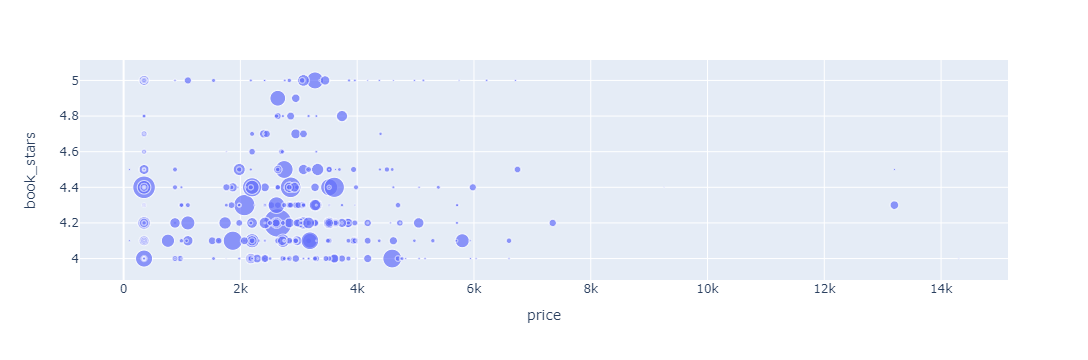

In [27]:
px.scatter(df, x = "price", y = "book_stars", size="reviews_num")

## 価格 (Price) vs. 書籍のページ数　(book length)

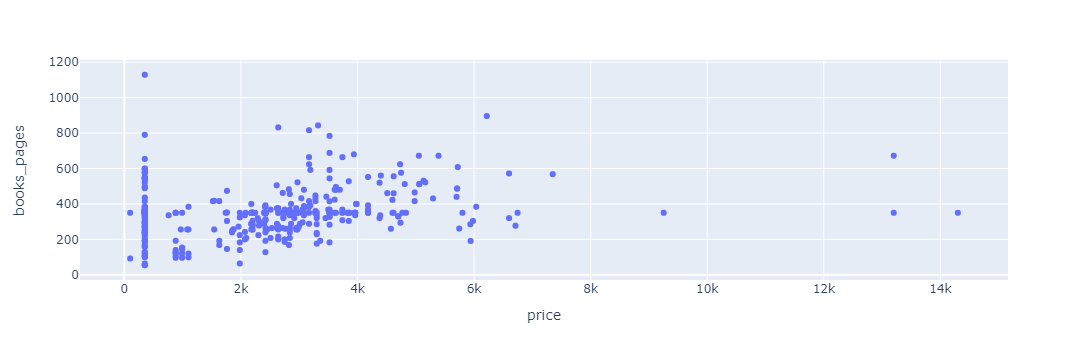

In [28]:
px.scatter(df, x="price", y="books_pages")

## Best Python books

In [29]:
# Select books based on title containing "Python"
python_books = df[df['title'].str.contains("Python")]

# Python books with most reviews and highest average rating
best_python_books = python_books.nlargest(7, ['reviews_num','book_stars'])
best_python_books

title  reviews_num  price  \
1                      スッキリわかるPython入門 (スッキリわかる入門シリーズ)          632   2640   
126                               Python実践データ分析100本ノック          400    350   
84                                    Pythonで儲かるAIをつくる          244   3190   
22         東京大学のデータサイエンティスト育成講座 ~Pythonで手を動かして学ぶデ―タ分析~          225   3278   
17                                        Python[完全]入門          168   3190   
123  Python実践入門 ── 言語の力を引き出し、開発効率を高める (WEB+DB PRESS...          105   3278   
81                 前処理大全[データ分析のためのSQL/R/Python実践テクニック]          100   3300   

     book_stars                  author  \
1           4.2              国本大悟 (著)     
126         4.4              久我 涼子 (著)    
84          4.1               朝井 淳 (著)    
22          5.0             清水 隆史 (著)     
17          4.1             山崎 泰史 (著)     
123         4.3  Anthony Molinaro (著)     
81          4.3              山森 丈範 (著)    

                                              book_url  books_pages  
1    https://www.amazon.co.jp/-/en/%E5%9B%BD%E6%9C%...          376  
126  https://www.amazon.co.jp/-/en/%E4%B8%8B%E5%B1%...          272  
84   https://www.amazon.co.jp/-/en/%E8%B5%A4%E7%9F%...          392  
22   https://www.amazon.co.jp/-/en/%E5%A1%9A%E6%9C%...          448  
17   https://www.amazon.co.jp/-/en/%E6%9D%BE%E6%B5%...          592  
123  https://www.amazon.co.jp/-/en/%E9%99%B6%E5%B1%...          350  
81   https://www.amazon.co.jp/-/en/%E6%9C%AC%E6%A9%...          336

In [30]:
# Select books based on title containing "Python"
sql_books = df[df['title'].str.contains("SQL")]

# Python books with most reviews and highest average rating
best_sql_books = sql_books.nlargest(7, ['reviews_num','book_stars'])
best_sql_books

title  reviews_num  price  \
3             SQL 第2版 ゼロからはじめるデータベース操作 (プログラミング学習シリーズ)          352   2068   
96         スッキリわかるSQL入門 第2版 ドリル222問付き! (スッキリわかる入門シリーズ)          276   4600   
2                    達人に学ぶSQL徹底指南書 第2版 初級者で終わりたくないあなたへ          248   2750   
51   集中演習 SQL入門 Google BigQueryではじめるビジネスデータ分析 (できるD...          120   3080   
33                                          SQLアンチパターン          102   3520   
81                 前処理大全[データ分析のためのSQL/R/Python実践テクニック]          100   3300   
101                               [改訂第4版]SQLポケットリファレンス           86   2178   

     book_stars                        author  \
3           4.3                      ミック (著)    
96          4.0                    米津 武至 (著)    
2           4.5                      ミック (著)    
51          4.2                yoku0825 (著)     
33          4.2  富士通エフ・オー・エム株式会社 (FOM出版) (著)    
81          4.3                    山森 丈範 (著)    
101         4.0             富士通ラーニングメディア (著)    

                                              book_url  books_pages  
3    https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...          336  
96   https://www.amazon.co.jp/-/en/%E4%B8%AD%E5%B1%...          350  
2    https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%...          368  
51   https://www.amazon.co.jp/-/en/%E6%9C%A8%E7%94%...          480  
33   https://www.amazon.co.jp/-/en/Bill-Karwin/dp/4...          352  
81   https://www.amazon.co.jp/-/en/%E6%9C%AC%E6%A9%...          336  
101  https://www.amazon.co.jp/-/en/%E6%9C%9D%E4%BA%...          350

##  書籍タイトルのクラスタリング　（Clustering book titles）

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2))

X = vectorizer.fit_transform(df["title"])

In [32]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

C:\Users\deymo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



061  061 対応  0対応  100本ノック  100本ノック 第2版  102  102 web  104  10g  10g 対応  \
0    0.0     0.0  0.0      0.0          0.0  0.0      0.0  0.0  0.0     0.0   
1    0.0     0.0  0.0      0.0          0.0  0.0      0.0  0.0  0.0     0.0   
2    0.0     0.0  0.0      0.0          0.0  0.0      0.0  0.0  0.0     0.0   
3    0.0     0.0  0.0      0.0          0.0  0.0      0.0  0.0  0.0     0.0   
4    0.0     0.0  0.0      0.0          0.0  0.0      0.0  0.0  0.0     0.0   
..   ...     ...  ...      ...          ...  ...      ...  ...  ...     ...   
397  0.0     0.0  0.0      0.0          0.0  0.0      0.0  0.0  0.0     0.0   
398  0.0     0.0  0.0      0.0          0.0  0.0      0.0  0.0  0.0     0.0   
399  0.0     0.0  0.0      0.0          0.0  0.0      0.0  0.0  0.0     0.0   
400  0.0     0.0  0.0      0.0          0.0  0.0      0.0  0.0  0.0     0.0   
401  0.0     0.0  0.0      0.0          0.0  0.0      0.0  0.0  0.0     0.0   

     ...  高速でわかりやすいクエリの書き方  高速でわかりやすいクエリの書き方 web  高速モバイルデータベースrealm入門  \
0    ...               0.0                   0.0                  0.0   
1    ...               0.0                   0.0                  0.0   
2    ...               0.0                   0.0                  0.0   
3    ...               0.0                   0.0                  0.0   
4    ...               0.0                   0.0                  0.0   
..   ...               ...                   ...                  ...   
397  ...               0.0                   0.0                  0.0   
398  ...               0.0                   0.0                  0.0   
399  ...               0.0                   0.0                  0.0   
400  ...               0.0                   0.0                  0.0   
401  ...               0.0                   0.0                  0.0   

     高速文字列解析の世界  高速文字列解析の世界 データ圧縮  魅せる  魅せる 伝わる資料作成に役立つ本  ａでわかる医療ビッグデータの法律と実務  \
0           0.0               0.0  0.0               0.0                  0.0   
1           0.0               0.0  0.0               0.0                  0.0   
2           0.0               0.0  0.0               0.0                  0.0   
3           0.0               0.0  0.0               0.0                  0.0   
4           0.0               0.0  0.0               0.0                  0.0   
..          ...               ...  ...               ...                  ...   
397         0.0               0.0  0.0               0.0                  0.0   
398         0.0               0.0  0.0               0.0                  0.0   
399         0.0               0.0  0.0               0.0                  0.0   
400         0.0               0.0  0.0               0.0                  0.0   
401         0.0               0.0  0.0               0.0                  0.0   

     ａでわかる医療ビッグデータの法律と実務 次世代医療基盤法  ａｉビジネス  
0                             0.0     0.0  
1                             0.0     0.0  
2                             0.0     0.0  
3                             0.0     0.0  
4                             0.0     0.0  
..                            ...     ...  
397                           0.0     0.0  
398                           0.0     0.0  
399                           0.0     0.0  
400                           0.0     0.0  
401                           0.0     0.0  

[402 rows x 2045 columns]

In [33]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# Kmeans clustering
K = range(2,5)
for k in K:
    km = KMeans(n_clusters=k, max_iter=600, n_init=10)
    km.fit(X)
    sum_of_squared_distances.append(km.inertia_)

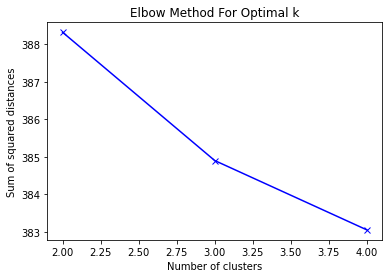

In [34]:
import matplotlib.pyplot as plt

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [35]:
# Get clusters
true_k = 2
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# Get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["title"],labels)),columns=['title','cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                 title  cluster
0                      達人に学ぶDB設計 徹底指南書 初級者で終わりたくないあなたへ        0
269         スケーラブルリアルタイムデータ分析入門 ―ラムダアーキテクチャによるビッグデータ処理        0
268                  基本がわかるSQL入門 ——データベース&設計の基礎から楽しく学ぶ        0
267  FileMaker データベース問題解決ガイド　Pro/Advanced/Server/Go...        0
266        Access入門 基礎 テーブル、クエリ、フォーム、レポート、マクロ編: アクセス練習        0
..                                                 ...      ...
117  Fluentd実践入門 ── 統合ログ基盤のためのデータ収集ツール (WEB+DB PRES...        1
307                               WEB+DB PRESS Vol.104        1
329                               WEB+DB PRESS Vol.104        1
249                               WEB+DB PRESS Vol.120        1
137  [増補改訂]良いコードを書く技術 ── 読みやすく保守しやすいプログラミング作法 (WEB+...        1

[402 rows x 2 columns]


In [36]:
%matplotlib inline
import os
import wordcloud
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from janome.tokenizer import Tokenizer
from PIL import Image

In [37]:
# #画像の大きさを設定
# figsize_px = np.array([1280, 720])
# dpi = 100
# figsize_inch = figsize_px / dpi
# print("figsize", figsize_inch)  # figsize (6.4, 3.6)
# fig, ax = plt.subplots(figsize=figsize_inch, dpi=dpi)

# #描画する
# wc.generate(" ".join(words_list))
# plt.imshow(wc)
# plt.axis("off")
# #保存先の指定
# dir_name1 = 'out'
# keishiki = '.png'
# path = os.path.join(path1, dir_name1, dir_name2, title) + keishiki
# print(path)

# #画像の保存
# plt.savefig(path)

figsize [7.32 4.12]
figsize [7.32 4.12]


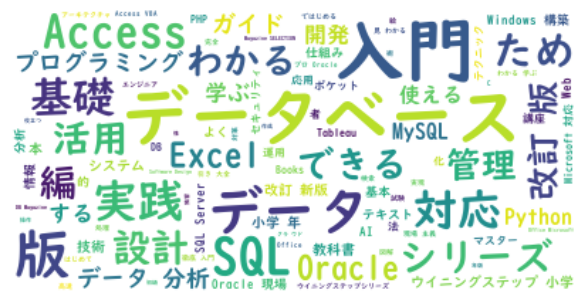

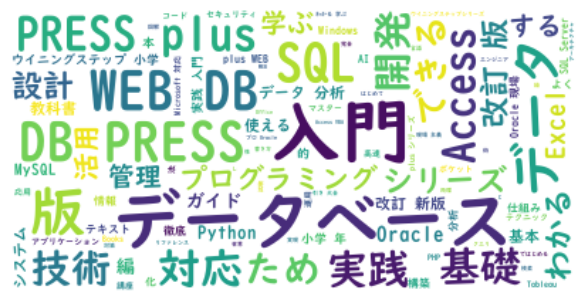

In [39]:
tk = Tokenizer()
words_list = []

#動詞、形容詞、形容動詞、名詞、副詞、連体詞、接続詞、感動詞、助動詞、助詞のどれを抽出するか。

hinshi = ['動詞','形容詞','形容動詞','名詞','副詞','感動詞']

for k in range(true_k):
    for i in hinshi:
        text = book_cl[book_cl.cluster == k]['title'].str.cat(sep=' ')
        for token in tk.tokenize(text):
            if token.part_of_speech.split(",")[0] == i:
                words_list.append(token.surface)
          
#1文字の単語を出現させるにはregexpの設定が必要
    wc = wordcloud.WordCloud(max_font_size=50, max_words=100, background_color="white", font_path=r"C:\Windows\Fonts\UDDigiKyokashoN-B.ttc", regexp="[\w']+")

    figsize_px = np.array([732, 412])
    dpi = 100
    figsize_inch = figsize_px / dpi
    print("figsize", figsize_inch)  # figsize (6.4, 3.6)
    fig, ax = plt.subplots(figsize=figsize_inch, dpi=dpi)
    
    wc.generate(" ".join(words_list))
    #plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
    plt.plot()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
plt.show()   
    

## Scraping Amazon Book reviews

In [21]:
pd.set_option('display.max_colwidth', None)

In [22]:
df.head(2)

title  reviews_num  price  book_stars  \
0  達人に学ぶDB設計 徹底指南書 初級者で終わりたくないあなたへ          333   2860         4.4   
1  スッキリわかるPython入門 (スッキリわかる入門シリーズ)          632   2640         4.2   

       author  \
0    ミック (著)    
1  国本大悟 (著)     

                                                                           book_url  \
0           https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%83%E3%82%AF/dp/4798124702   
1  https://www.amazon.co.jp/-/en/%E5%9B%BD%E6%9C%AC%E5%A4%A7%E6%82%9F/dp/4295006327   

   books_pages  
0          350  
1          376

In [23]:
import re
review_pages = []

def get_review_url(product_url):
    try:
        split_url = product_url.split('dp/')
        if len(split_url) < 2:
            raise ValueError('Invalid URL')
        product_number = split_url[1]
        #print('split_url:', split_url)
        #print('product_number:', product_number)
        if product_number is None:
            raise ValueError('Product number not found')
        review_url = split_url[0] + 'product-reviews/' + product_number + "/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"
        review_pages.append(review_url)
    except ValueError as e:
        #print(f'Error: {e}')
        review_url = None
        review_pages.append(review_url)

for url in df["book_url"]:
    get_review_url(url)

In [24]:
len(review_pages)

402

In [25]:
df2 = df.copy()
new_df = pd.Series(review_pages)

# Add new series as a new column to the dataframe
df2['review_urls'] = new_df

In [26]:
# html = "https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%83%E3%82%AF/dp/4798124702"
# print(get_review_url(html))

In [27]:
# # Create review urls for each book in dataset
# df['review_urls'] = df['book_url'].apply(lambda x: get_review_url(x))

# # Remove empty review urls and create a new dataset
# df_reviews = df.loc[~df['review_urls'].isnull()].reset_index()

In [28]:
# Code adapted from Jeff James https://gist.github.com/jrjames83/4653d488801be6f0683b91eda8eeb627
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime
import logging

headers = {
    "authority": "www.amazon.com",
    "pragma": "no-cache",
    "cache-control": "no-cache",
    "dnt": "1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36",
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9",
    "sec-fetch-site": "none",
    "sec-fetch-mode": "navigate",
    "sec-fetch-dest": "document",
    "accept-language": "en-GB,en-US;q=0.9,en;q=0.8",
}

URLS = df2['review_urls']
book_titles = df2['title']

def get_page_html(page_url: str) -> str:
    resp = requests.get(page_url, headers=headers)
    return resp.text

def get_reviews_from_html(page_html: str) -> BeautifulSoup:
    soup = BeautifulSoup(page_html, "lxml")
    reviews = soup.find_all("div", {"class": "a-section celwidget"})
    return reviews

def get_review_text(soup_object: BeautifulSoup) -> str:
    review_text = soup_object.find(
        "span", {"class": "a-size-base review-text review-text-content"}
    ).get_text()
    return review_text.strip()

def get_number_stars(soup_object: BeautifulSoup) -> str:
    stars = soup_object.find("span", {"class": "a-icon-alt"}).get_text()
    return stars.strip()

def orchestrate_data_gathering(single_review: BeautifulSoup) -> dict:
    return {
        "review_text": get_review_text(single_review),
        "review_stars": get_number_stars(single_review)
    }

if __name__ == '__main__':
    logging.basicConfig(level=logging.INFO)
    all_results = []

    for i in range(len(URLS)):
        logging.info(URLS[i])
        html = get_page_html(URLS[i])
        reviews = get_reviews_from_html(html)
        for rev in reviews:
            data = orchestrate_data_gathering(rev)
            data.update({'title': df2['title'][i]})
            all_results.append(data)

    out = pd.DataFrame.from_records(all_results)
    logging.info(f"Total number of reviews {out.shape[0]}")
    save_name = f"book_reviews_{datetime.now().strftime('%Y-%m-%d-%m')}.csv"
    logging.info(f"saving to {save_name}")
    out.to_csv(save_name, index=False)
    logging.info('Done yayy')

INFO:root:https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%83%E3%82%AF/product-reviews/4798124702/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.co.jp/-/en/%E5%9B%BD%E6%9C%AC%E5%A4%A7%E6%82%9F/product-reviews/4295006327/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%83%E3%82%AF/product-reviews/4798157821/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.co.jp/-/en/%E3%83%9F%E3%83%83%E3%82%AF/product-reviews/4798144452/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.co.jp/-/en/%E5%BE%B3%E4%B8%B8-%E6%B5%A9/product-reviews/4797393165/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
INFO:root:https://www.amazon.co.jp/-/en/%E6%A0%AA%E5%BC%8F%E4%BC%9A%E7%A4%BE%E3%83%93%E3%83%BC%E3%83%97%E3%83%A9%E3%82%A6%E3%83%89/product-reviews/4295016055/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all

In [8]:
book_reviews = pd.read_csv('book_reviews_2023-05-15-05.csv')

# Aggregate reviews for each book title
book_reviews['review_text'] = book_reviews['review_text'].astype(str)
book_reviews_agg = book_reviews.groupby(['title'], as_index = False).agg({'review_text': ' '.join})
#book_reviews_agg.head()

In [9]:
column = book_reviews['review_text']

# Convert column to a list
text_list = column.tolist()

# Open file in write mode
with open('output.txt', 'w', encoding='utf-8') as file:
    # Write each element of the list to the file
    for text in text_list:
        file.write(text + '\n')

In [10]:
from pysummarization.nlpbase.auto_abstractor import AutoAbstractor
from pysummarization.tokenizabledoc.mecab_tokenizer import MeCabTokenizer
from pysummarization.abstractabledoc.top_n_rank_abstractor import TopNRankAbstractor

In [11]:
# document = "".join(book_reviews_agg['review_text'])
# # 自動要約のオブジェクトを生成
# auto_abstractor = AutoAbstractor()
# # トークナイザー（単語分割）にMeCabを指定
# auto_abstractor.tokenizable_doc = MeCabTokenizer()
# # 文書の区切り文字を指定
# auto_abstractor.delimiter_list = ["。", "\n"]
# # キュメントの抽象化、フィルタリングを行うオブジェクトを生成
# abstractable_doc = TopNRankAbstractor()
# # 文書の要約を実行
# result_dict = auto_abstractor.summarize(document, abstractable_doc)

In [12]:
import MeCab
def document_summarize(file):

    #ファイルの読み込み
    with open(file,encoding='utf-8') as f:
        contents = f.readlines()      
    
    #全ての行を結合
    document = ''.join(contents)
    # 自動要約のオブジェクトを生成
    auto_abstractor = AutoAbstractor()
    # トークナイザー（単語分割）にMeCabを指定
    auto_abstractor.tokenizable_doc = MeCabTokenizer()
    # 文書の区切り文字を指定
    auto_abstractor.delimiter_list = ["。", "\n"]
    # キュメントの抽象化、フィルタリングを行うオブジェクトを生成
    abstractable_doc = TopNRankAbstractor()
    # 文書の要約を実行
    result_dict = auto_abstractor.summarize(document, abstractable_doc)
 
    return [x.replace('\n','') for x in result_dict["summarize_result"]]

In [13]:
document_summarize("output.txt")

['内容は図などもあり練習問題＋解説もありわかりやすかった。',
 '前半は論理・物理設計や正規化の話で、後半はパフォーマンスやノウハウの内容となっている。',
 'タイトルに「初級者で終わりたくないあなたへ」とあるので、初級者以上を目指す人なら論理・物理設計や正規化の知識はあると思うので、前半はもっと薄くても良い気がした。',
 '著者の主張が一貫していて読みやすいし、内容も理解しやすい。',
 'データベース設計を担当してなくても読んでおいて損はないと思う。',
 'ここで一番えられた情報は論理設計の手順物理設計の手順パフォーマンスとテーブル最適化のトレードオフがとても分かりやすく、現在作成中のサービスの設計に大いに役に立った。',
 '星4の理由としては、グレートノウハウ、バットノウハウの例が少し想像していたものと違った。',
 'SEでない人を想定読者としていますので、解説はとても平易で分かりやすいですが、SEである私にとっても有用な内容でした。',
 '大事な箇所にはあらかじめ赤線が引いてあるので、とても読みやすく、分かりやすかったです。',
 '内容としても、データベースの設計-論理設計・物理設計-をわかりやすく説明している。']

In [14]:
# import MeCab
# print(MeCab.Tagger('-Owakati').parse('こんにちは、世界！'))

こんにちは 、 世界 ！ 

